In [1]:
import sys
sys.path.insert(0, '..') 
%load_ext autoreload
%autoreload 2

from tasks.independent_integration_task import *

# Task: integrate independent velocities

## Test old functionality

In [2]:
from tasks.independent_integration_task import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [59]:
omega_range = [0.005]
num_samples = len(omega_range)
num_timesteps = 2500
num_samples = 1_000

inputs, targets = generate_dataset(num_samples, num_timesteps, constant_omega=True, omega_range=omega_range, dt=.5, sigma=0.01, alpha=0.05)
plot_data(inputs, targets, num_timesteps)

TypeError: zero_inflated_OU() got an unexpected keyword argument 'constant_omega'

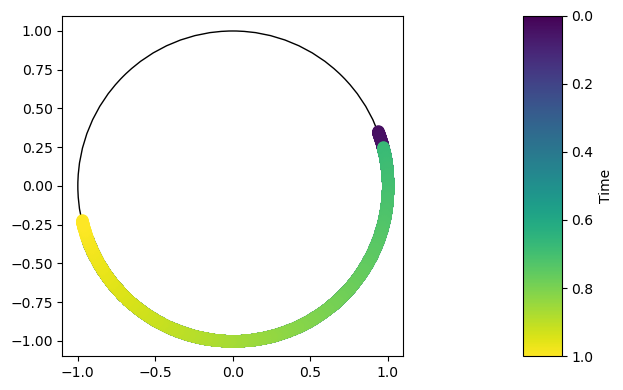

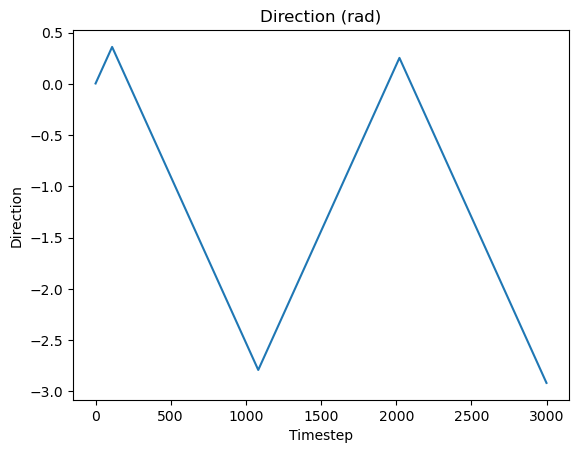

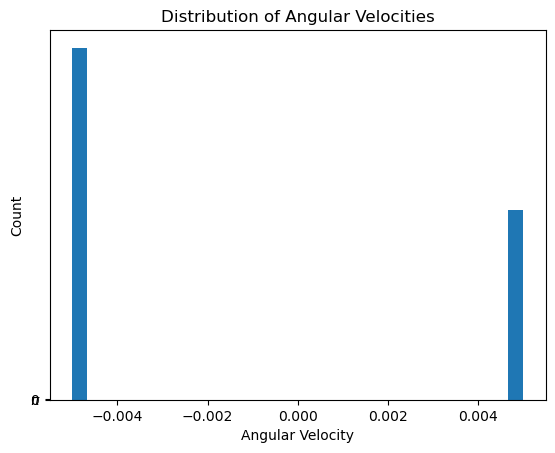

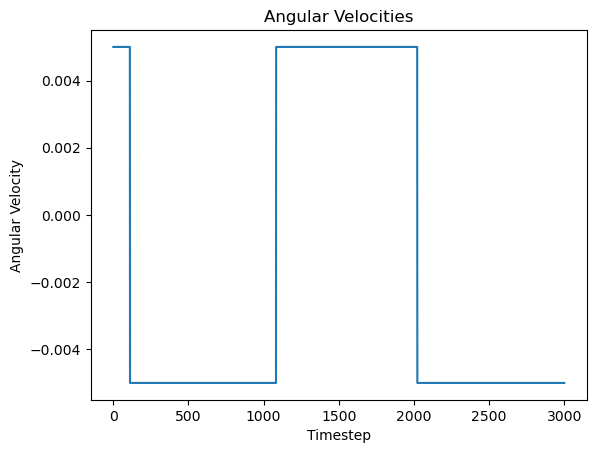

In [5]:
num_samples = 100
num_timesteps = 3000
flip_freq = .005
refractory_period_ratio = .3
inputs, targets = generate_dataset(num_samples, num_timesteps, dt=.5, omega_process='binary', flip_freq=flip_freq, refractory_period_ratio=refractory_period_ratio)

plot_data(inputs, targets, num_timesteps)

In [6]:
inputs.shape

(100, 3000, 3)

In [7]:
inputs[0,...].shape

(3000, 3)

In [46]:
import numpy as np

random_number = np.random.choice([-1, 1], size=1)
print(random_number)


[1]


## Multiple independent velocity dataset generator

In [115]:
# Define parameters
num_samples = 100
num_trajectories = 1
num_timesteps = 5000
flip_rate = 2e-3
omega_process = 'binary'
omega_value = 0.005
dt = 0.5

# Generate the dataset
inputs, targets = generate_dataset(num_samples,
                                   num_timesteps,
                                   num_trajectories,
                                   dt=dt,
                                   flip_rate=flip_rate,
                                   omega_value=omega_value,
                                   include_initial_position=False
                                   )

`inputs` is `(num_samples, num_timesteps, num_trajectories)` tensor when we only pass as input the velocities. Currently, the positions in the training data all start from $\theta_0=0$. 

In [116]:
inputs.shape

(100, 5000, 1)

`targets` is `(num_samples, num_timesteps, num_trajectories * 2)` tensor when we only pass as input the velocities, where the last dimension is the $x$ and $y$ positions (in radians) 

In [117]:
targets.shape

(100, 5000, 2)

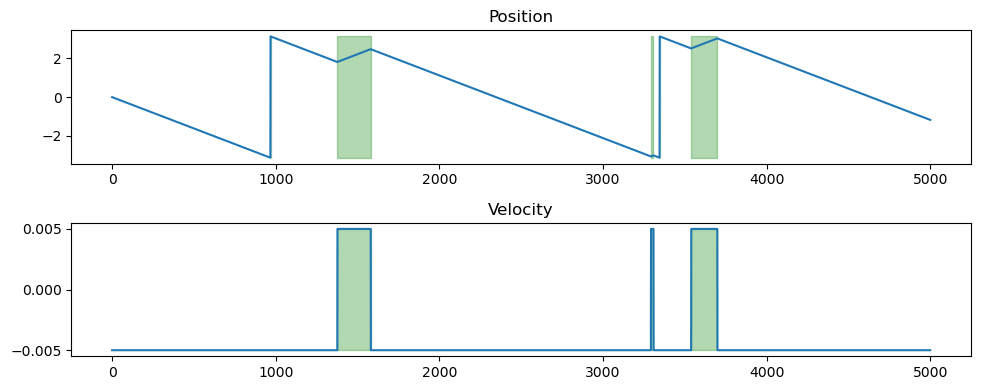

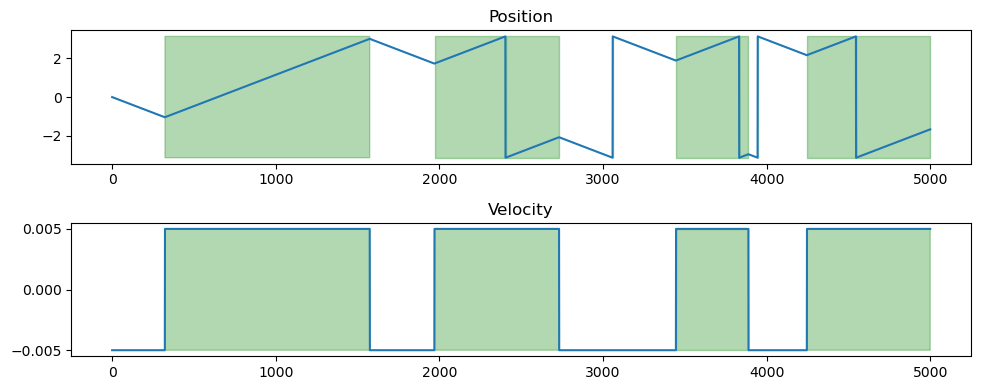

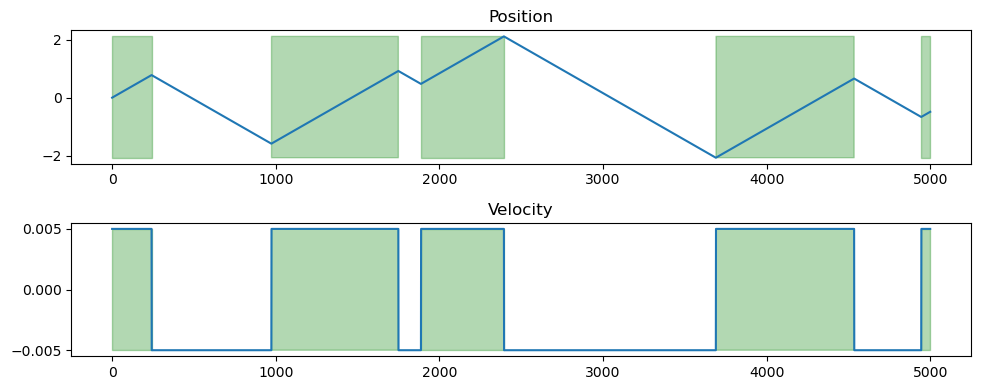

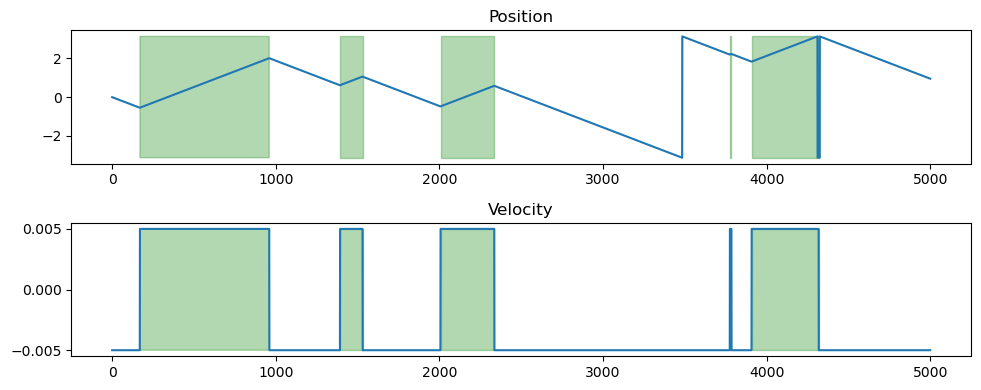

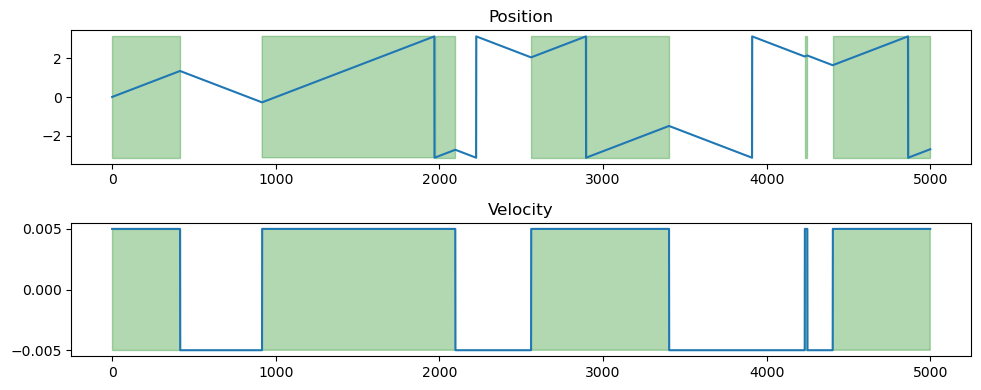

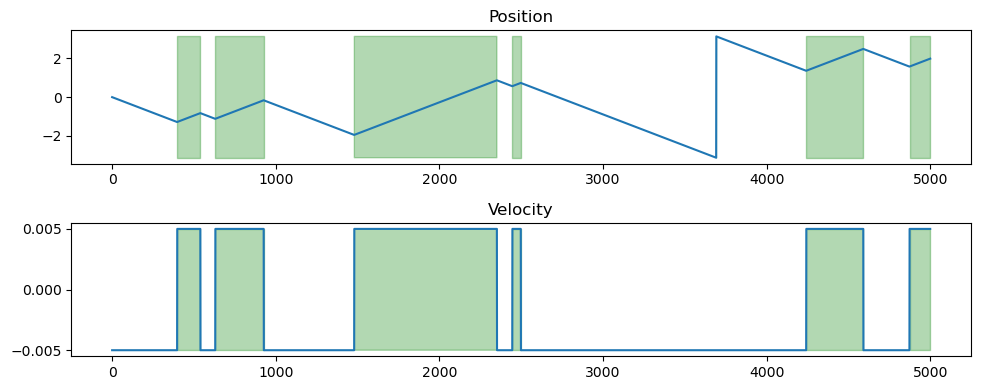

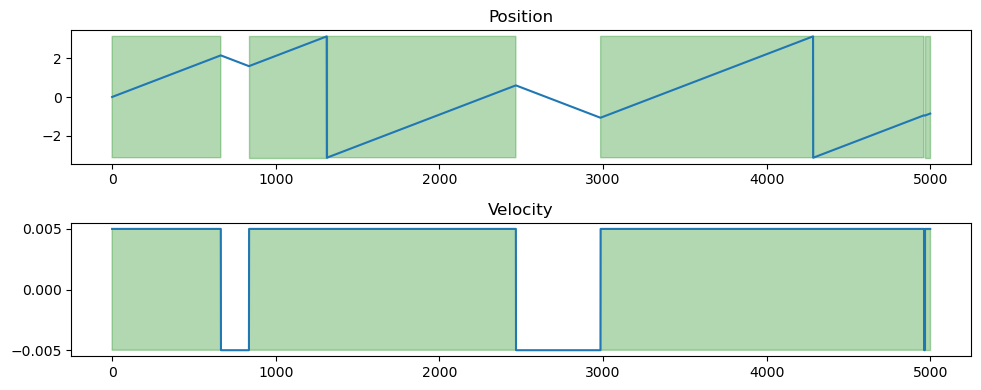

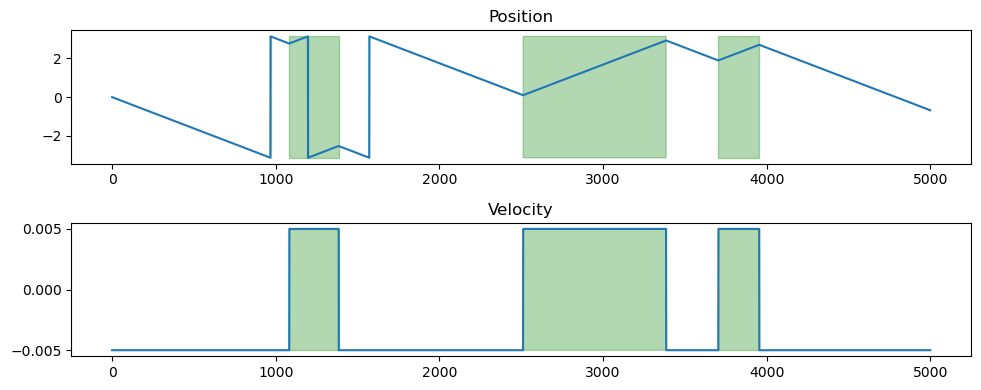

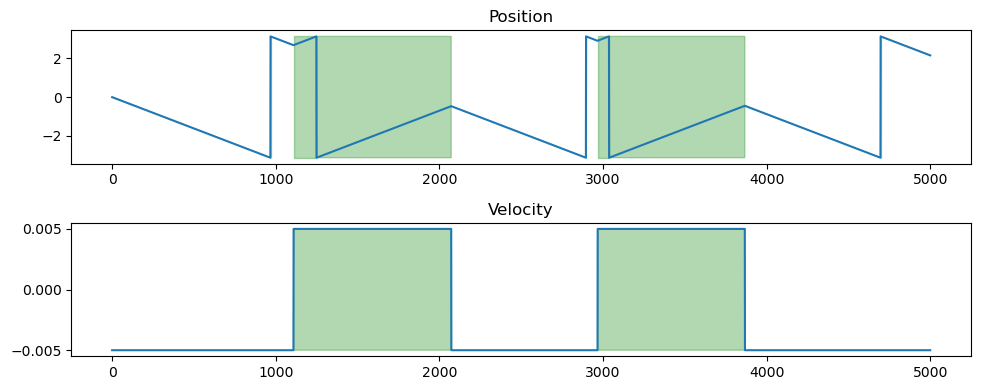

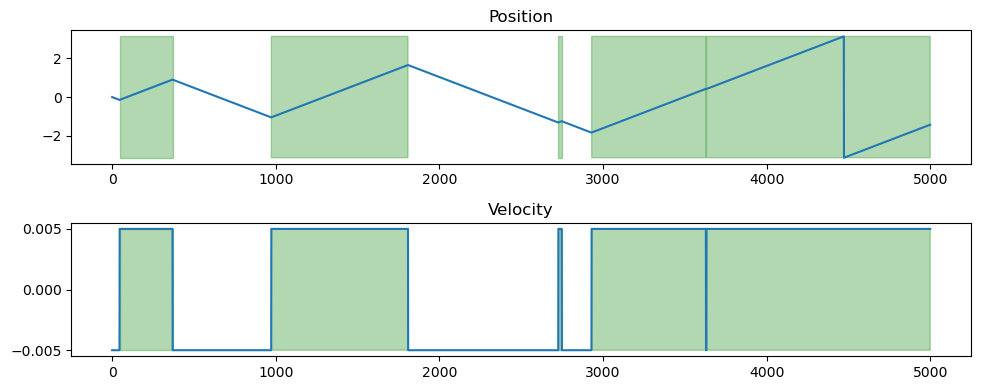

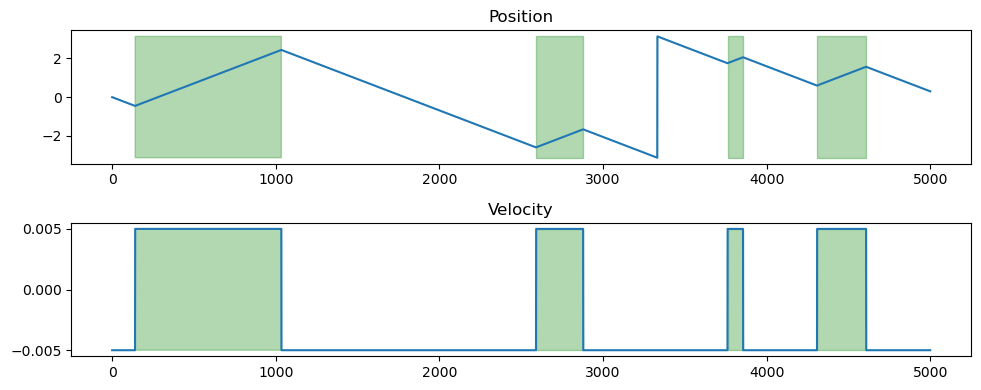

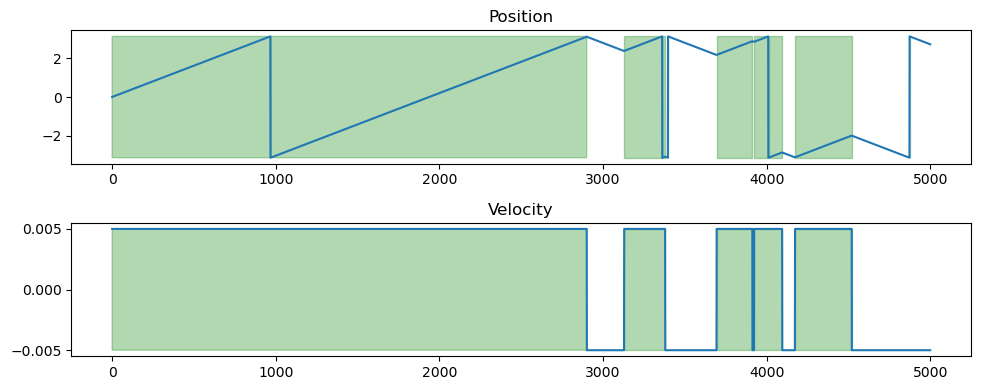

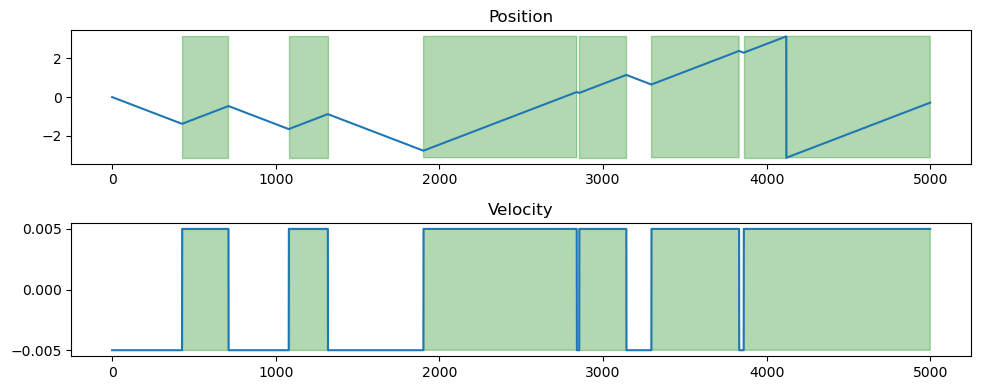

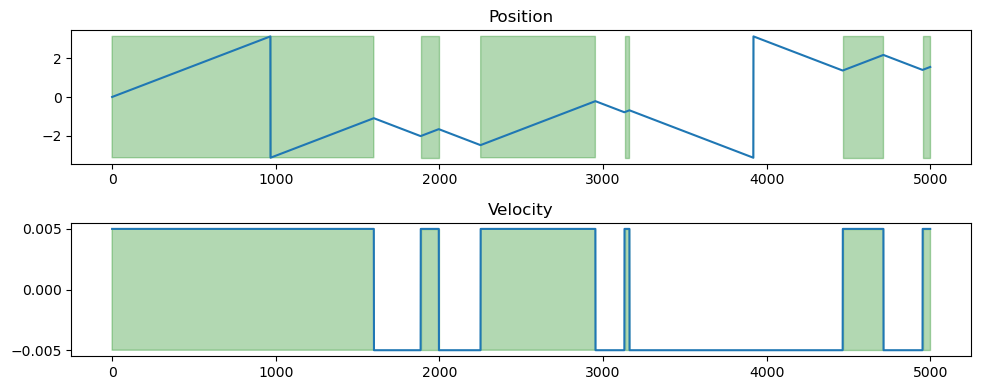

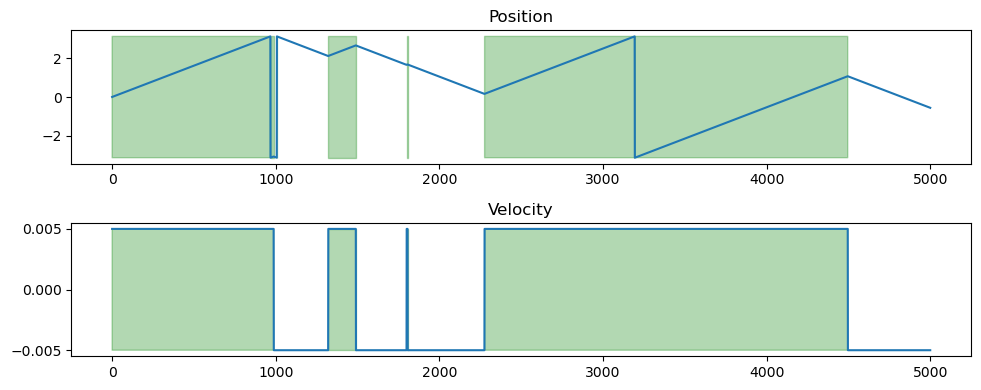

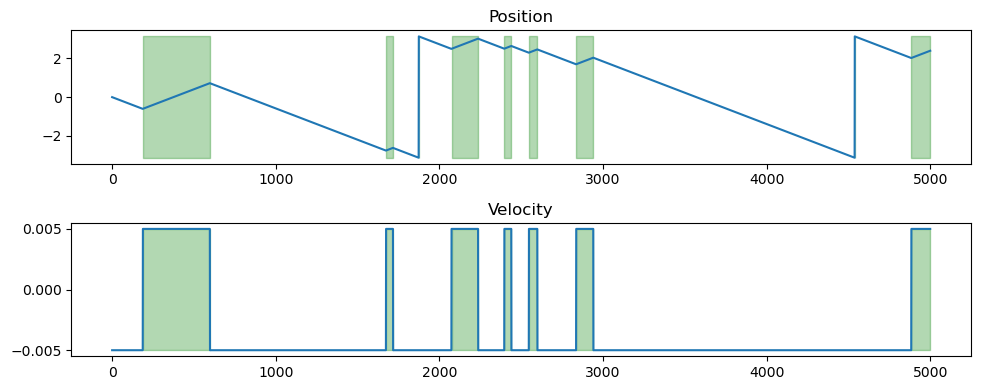

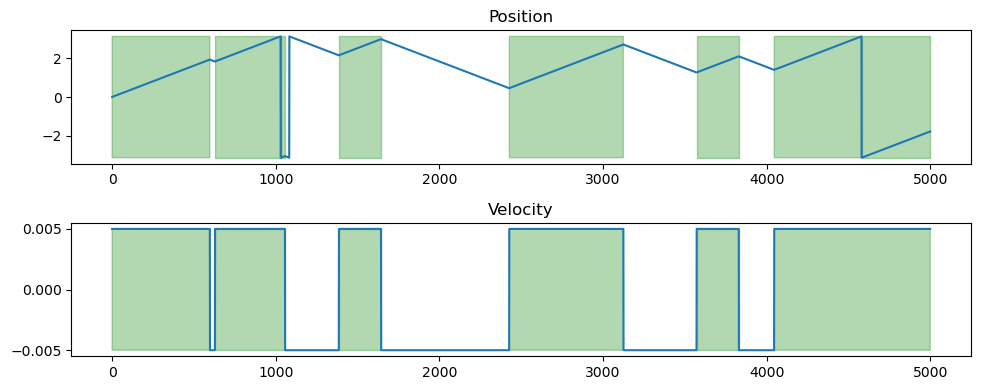

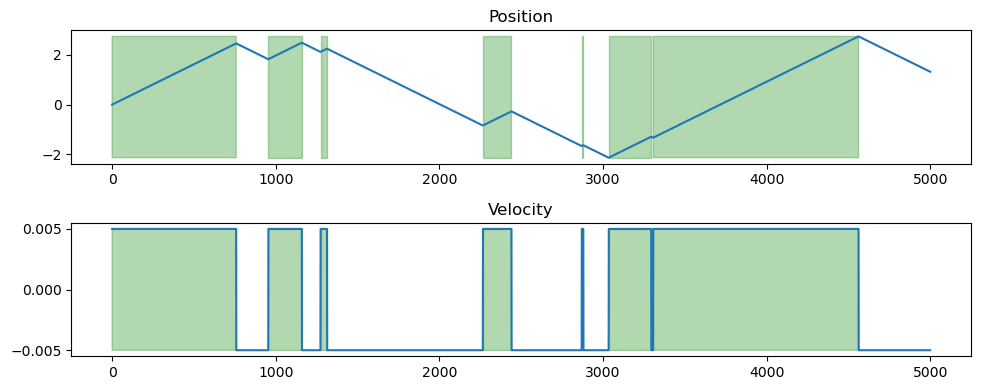

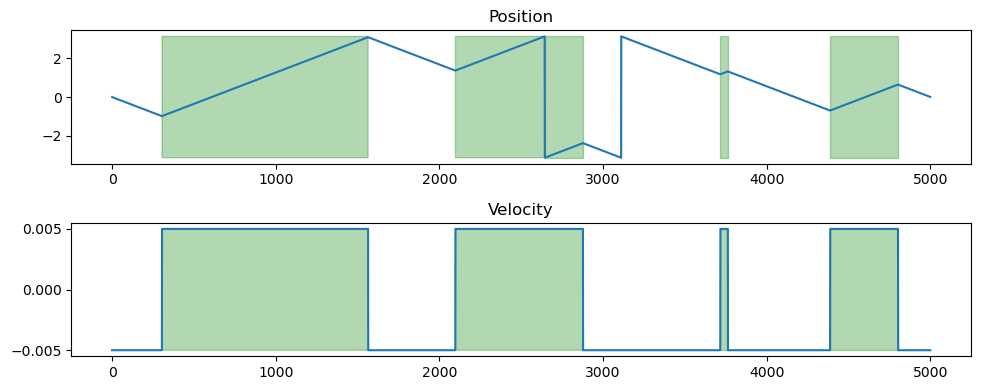

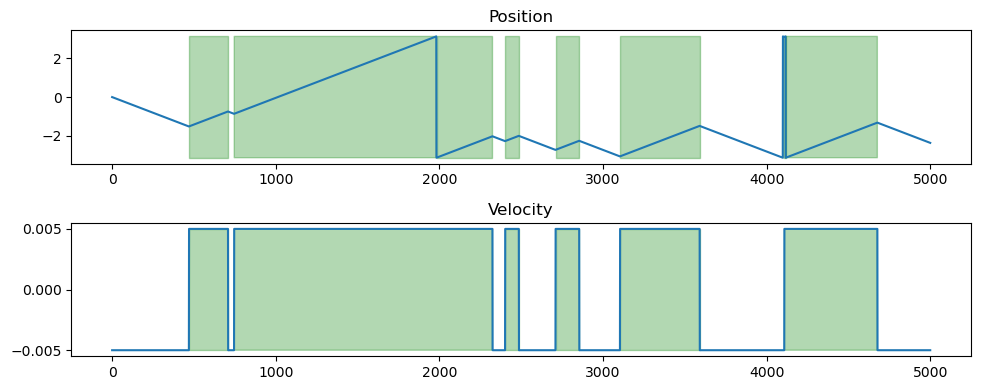

In [118]:
traj_idx = 0
for i in range(num_samples)[::5]:
    fig, axs = plt.subplots(2, 1, figsize=(10, 4))

    # Compute the angle from the target positions
    angle = np.arctan2(targets[i, :, 2*traj_idx+1], targets[i, :, 2*traj_idx])

    # Plot corresponding position from targets
    axs[0].plot(angle)
    axs[0].set_title('Position')

    # Shade regions where position is increasing
    axs[0].fill_between(range(len(angle)), angle.min(), angle.max(), where=np.diff(angle, prepend=0) > 0, color='green', alpha=0.3)

    # Plot omega trajectory
    velocity = inputs[i, :, traj_idx]
    axs[1].plot(velocity)
    axs[1].set_title('Velocity')

    # Shade regions where velocity is positive
    axs[1].fill_between(range(len(velocity)), velocity.min(), velocity.max(), where=velocity > 0, color='green', alpha=0.3)

    plt.tight_layout()
    plt.show()